In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from powerlaw import Fit
import collections
import numpy as np
import powerlaw as pl
import pandas as pd
from scipy.stats import linregress
import bct as bct

In [2]:
path = "../data/out.csv"
G = nx.read_edgelist(path, delimiter=',')

```EDA```

In [3]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Average_Clustering_Coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {Average_Clustering_Coefficient}")

Average_Shortest_Path = nx.average_shortest_path_length(G)
print(f"Average_Shortest_Path: {Average_Shortest_Path}")

Diameter = nx.diameter(G)
print(f"Diameter: {Diameter}")


Number of nodes: 4941
Number of edges: 6594
Average Clustering Coefficient: 0.08010361108159714
Average_Shortest_Path: 18.989185424445708
Diameter: 46


```Degree/Betweenness/Closeness Centrality```

In [8]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

critical_nodes_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
critical_nodes_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
critical_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]

print(f"Nodes with highest degree centrality: {critical_nodes_degree}")
print(f"Nodes with highest betweeness centrality: {critical_nodes_betweenness}")
print(f"Nodes with highest closeness centrality: {critical_nodes_closeness}")

Nodes with highest degree centrality: ['2847', '602', '932', '3411', '4436', '558', '2287', '2926', '2865', '3930']
Nodes with highest betweeness centrality: ['651', '559', '1365', '2824', '2685', '1324', '1378', '1213', '433', '2781']
Nodes with highest closeness centrality: ['1378', '1678', '2944', '1377', '2781', '1365', '1368', '1380', '2685', '2795']


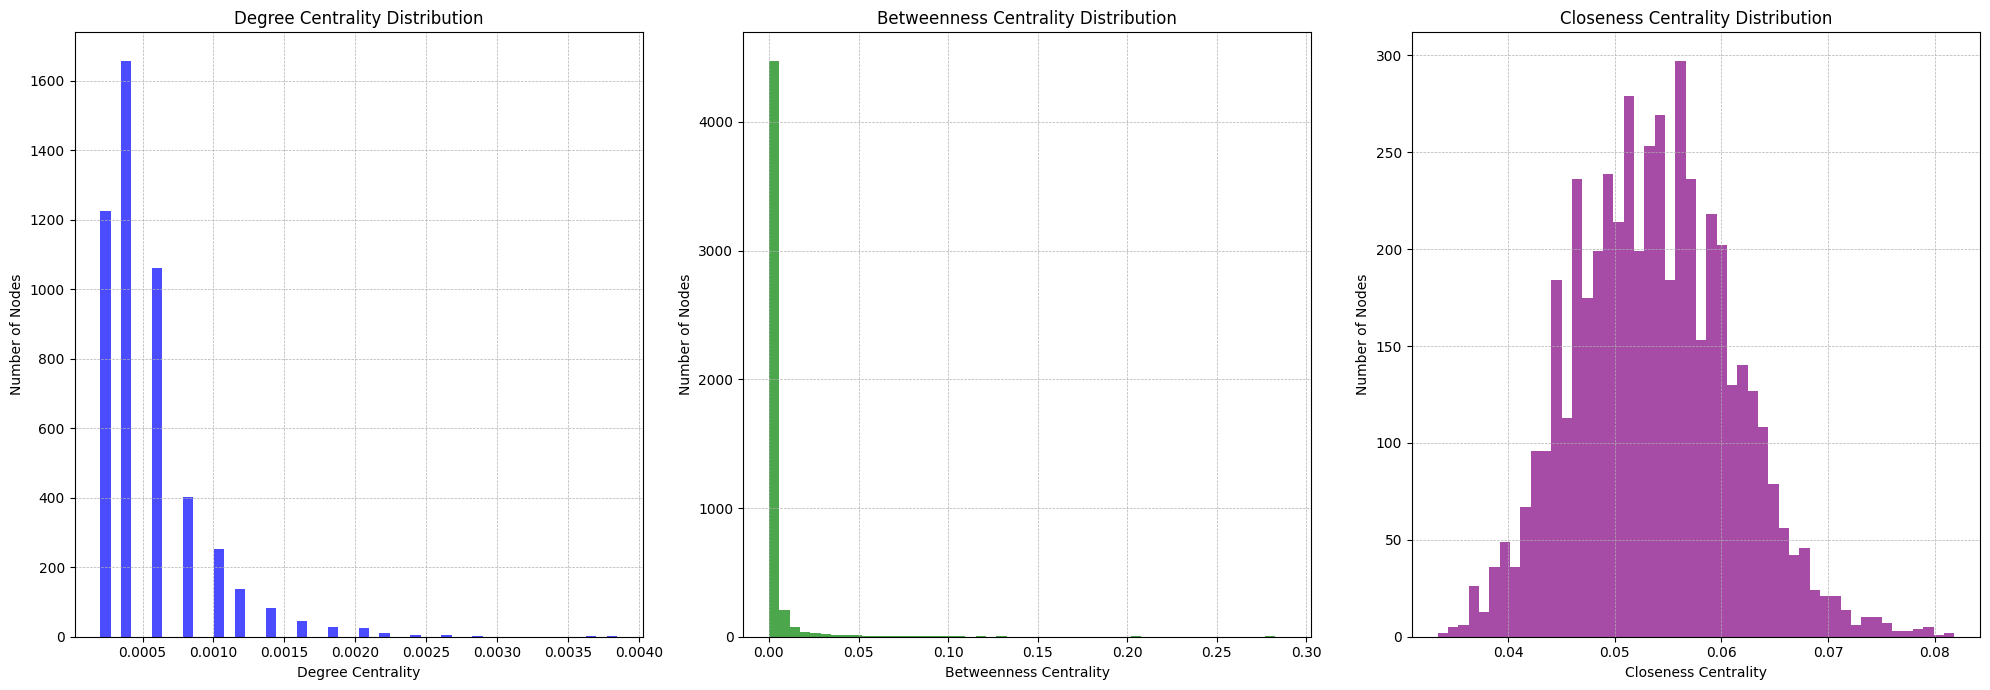

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
values = list(degree_centrality.values())

# Degree centrality
ax[0].hist(values, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Degree Centrality Distribution")
ax[0].set_xlabel("Degree Centrality")
ax[0].set_ylabel("Number of Nodes")
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[1].hist(list(betweenness_centrality.values()), bins=50, color='green', alpha=0.7)
ax[1].set_title("Betweenness Centrality Distribution")
ax[1].set_xlabel("Betweenness Centrality")
ax[1].set_ylabel("Number of Nodes")
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[2].hist(list(closeness_centrality.values()), bins=50, color='purple', alpha=0.7)
ax[2].set_title("Closeness Centrality Distribution")
ax[2].set_xlabel("Closeness Centrality")
ax[2].set_ylabel("Number of Nodes")
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

```Degree distribution```

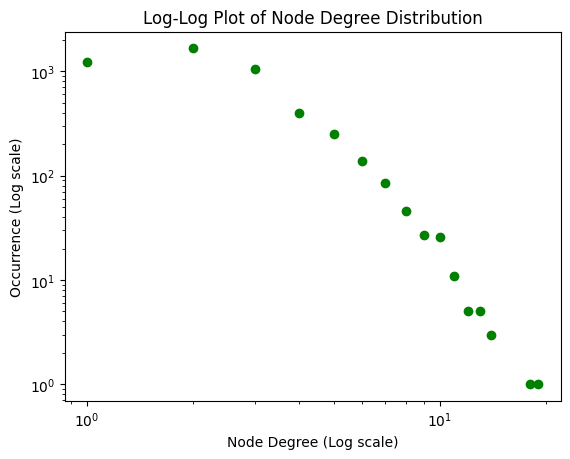

In [4]:
# Gather node degrees from the network into a list
node_degrees = [deg for n, deg in G.degree()]

# Tally the occurrences of each degree in the list
degree_frequency = Counter(node_degrees)
deg_vals, freq_vals = zip(*degree_frequency.items())

# Plot degree distribution using a scatter approach on a log-log scale
plt.scatter(deg_vals, freq_vals, color='green')

# Apply logarithmic scaling to axes for better visualization of power-law distribution
plt.xscale('log')
plt.yscale('log')

# Labeling axes and applying a title to the graph
plt.xlabel('Node Degree (Log scale)')
plt.ylabel('Occurrence (Log scale)')
plt.title('Log-Log Plot of Node Degree Distribution')

# Display the resulting plot
plt.show()


```Normalizing the degree distribution or converting raw frequency counts to probabilities```

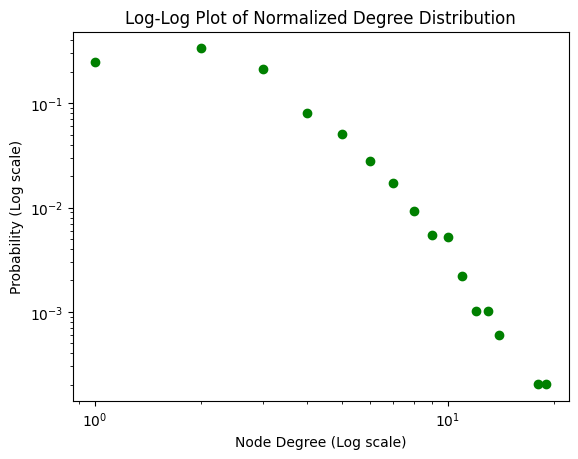

In [5]:
# Gather node degrees from the network into a list
node_degrees = [deg for n, deg in G.degree()]

# Calculate the normalized frequency of each degree value
degree_frequency = Counter(node_degrees)
deg_vals, freq_vals = zip(*degree_frequency.items())

# Normalize frequencies by the total number of nodes to get the probabilities
total_nodes = float(sum(freq_vals))
prob_vals = [f / total_nodes for f in freq_vals]

# Plot the normalized degree distribution on a log-log scale
plt.scatter(deg_vals, prob_vals, color='green')

# Set logarithmic scale for better visualization of power-law distribution
plt.xscale('log')
plt.yscale('log')

# Label the axes and title the plot
plt.xlabel('Node Degree (Log scale)')
plt.ylabel('Probability (Log scale)')
plt.title('Log-Log Plot of Normalized Degree Distribution')

# Display the plot
plt.show()


```Complementary Cumulative Distribution Function (CCDF) of Network Degrees```

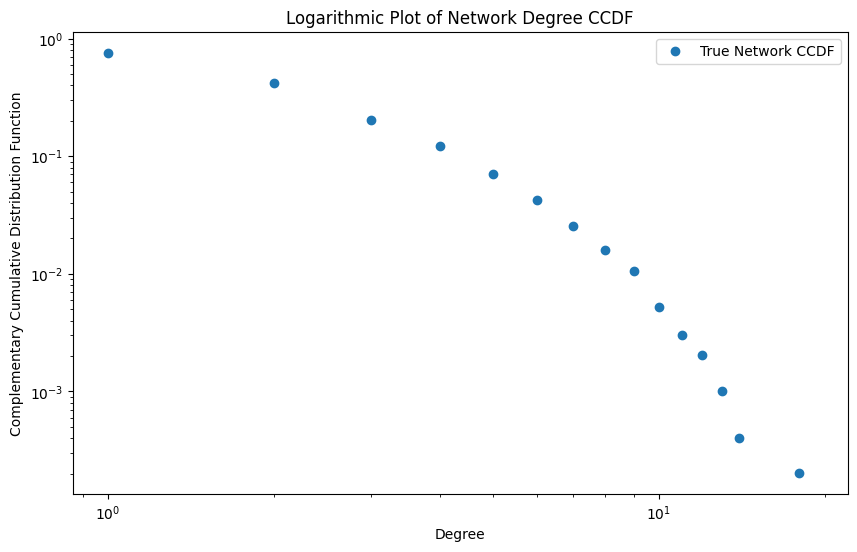

In [22]:
# Define a function to calculate the degree CCDF of a network graph
def calculate_degree_ccdf(net_graph):
    # Extract a descending sorted list of all node degrees in the graph
    deg_seq = sorted((deg for _, deg in net_graph.degree()), reverse=True)
    # Tally the degrees using Counter to get the frequency of each degree
    deg_freq = collections.Counter(deg_seq)
    # Unpack the degrees and their frequencies
    deg_values, freq = zip(*deg_freq.items())
    # Compute the CCDF as one minus the normalized cumulative frequency
    ccdf_vals = 1 - np.cumsum(freq[::-1])[::-1] / net_graph.number_of_nodes()
    return deg_values, ccdf_vals

# Execute the CCDF calculation for the given network graph G
deg_for_G, ccdf_for_G = calculate_degree_ccdf(G)

# Set up the plot with a specific figure size
plt.figure(figsize=(10, 6))
# Plot the CCDF on a log-log scale for visual clarity
plt.loglog(deg_for_G, ccdf_for_G, marker='o', linestyle='none', 
           label='True Network CCDF')
# Titling the plot for Degree CCDF on a logarithmic scale
plt.title('Logarithmic Plot of Network Degree CCDF')
# Labeling the x-axis as Degree
plt.xlabel('Degree')
# Labeling the y-axis as CCDF
plt.ylabel('Complementary Cumulative Distribution Function')
# Adding a legend to the plot for identification
plt.legend()
# Rendering the plot to display
plt.show()



```Power-Law Fit of Network Degree Distribution```


Calculating best minimal value for power law fit


<Axes: >

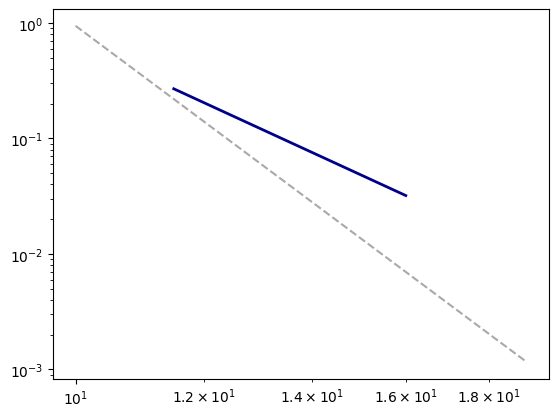

In [6]:
# Arrange node degrees in descending order to prepare for analysis
sorted_degrees = sorted((degree for _, degree in G.degree()), reverse=True)

# Apply power-law fit to the sorted list of degrees
degree_distribution_fit = Fit(sorted_degrees)

# Generate and plot the PDF of the degree distribution
pdf_plot = degree_distribution_fit.plot_pdf(color='darkblue', linewidth=2)

# Overlay the theoretical power-law PDF for comparison
degree_distribution_fit.power_law.plot_pdf(color='darkgrey', linestyle='--', ax=pdf_plot)



```Connected Component Analysis of the Network```


Number of connected components: 1
Sizes of the connected components: [4941]
Number of nodes in the largest component: 4941


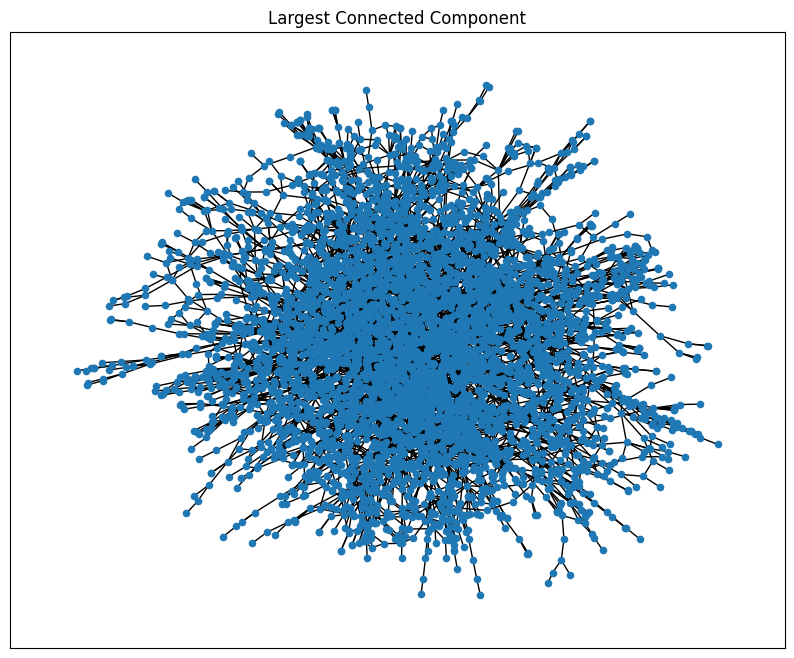

In [7]:
# Calculate the connected components in the graph
connected_components = list(nx.connected_components(G))

# Find the size (number of nodes) of each component
component_sizes = [len(c) for c in connected_components]

# Identify the largest connected component (LCC)
largest_cc = max(connected_components, key=len)
subgraph_lcc = G.subgraph(largest_cc)

# Print some basic stats
print(f"Number of connected components: {len(connected_components)}")
print(f"Sizes of the connected components: {component_sizes}")
print(f"Number of nodes in the largest component: {len(largest_cc)}")

# Visualize the largest connected component
plt.figure(figsize=(10, 8))
nx.draw_networkx(subgraph_lcc, with_labels=False, node_size=20)
plt.title('Largest Connected Component')
plt.show()


# Component Analysis of the Network

Upon conducting a component analysis of the given graph `G`, we have determined the following:

- **Number of Connected Components:** There is precisely one connected component within the network.
- **Sizes of the Connected Components:** The sole connected component encompasses all 4,941 nodes present in the network.
- **Nodes in the Largest Component:** Correspondingly, the largest connected component consists of all 4,941 nodes, affirming the network's cohesion.

## Interpretation

This outcome suggests that our network is entirely connected, which is a typical characteristic of infrastructure networks, such as the power grid this dataset represents. In practical terms, this denotes that there exists a pathway between any two nodes within the network, indicative of the following attributes:

### Robust Connectivity
The presence of a single connected component underscores the robustness of the network's structure. This implies that in the event of a node or edge failure, the network is likely to maintain its operational integrity due to the existence of alternate pathways that can potentially bypass the point of failure.

### Network Resilience
For an infrastructure network like the power grid, having all nodes within a single component is indicative of resilience. It ensures that the entire network can be sustained without fragmentation, even when certain disruptions occur.

### Simplification of Network Analysis
With the network forming a single connected unit, any subsequent network-wide analysis (such as calculating the network diameter or average shortest path length) becomes inherently representative of the entire network. This simplifies both the analysis and interpretation of network characteristics.

### Redundancy and Homogeneity
A single, expansive connected component may also reflect a level of redundancy within the network's connections. Such redundancy is a valuable feature for critical infrastructure networks, providing backup routes for the continuity of service. Furthermore, the homogeneity of the network's structure could be inferred, suggesting uniformity in connectivity across the entire network.

In conclusion, the component analysis substantiates the network's integrity and interconnected nature, which are desirable features for the continued reliability and serviceability of the represented power grid system.


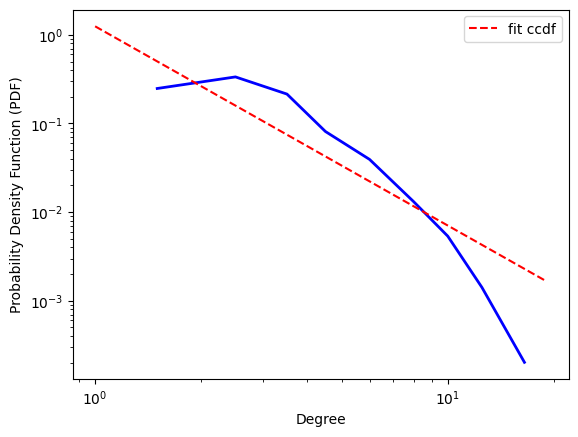

In [30]:
# Calculate the degree of each node and create a list of degrees
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Fit the degree distribution to a power-law distribution
fit = powerlaw.Fit(degree_sequence, xmin=min(degree_sequence))

# Plot the degree distribution and the best fit line
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc='upper right')

# Show the plot
plt.show()



In [29]:
# Assume 'data' contains the degree sequence of your network
data = [d for n, d in G.degree()]

# Fit the power-law distribution to data
results = powerlaw.Fit(data)

# The R and p values compare the likelihoods of the data under two distributions.
# The built-in distributions are: power_law, exponential, truncated_power_law, 
# lognormal, and stretched_exponential.

# Compare with exponential distribution
R, p = results.distribution_compare('power_law', 'exponential')
print('Power-law vs Exponential: R =', R, 'p-value =', p)

# Compare with log-normal distribution
R, p = results.distribution_compare('power_law', 'lognormal')
print('Power-law vs Log-normal: R =', R, 'p-value =', p)

# Compare with stretched exponential distribution
R, p = results.distribution_compare('power_law', 'stretched_exponential')
print('Power-law vs Stretched Exponential: R =', R, 'p-value =', p)

# Compare with truncated power-law distribution
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print('Power-law vs Truncated Power-law: R =', R, 'p-value =', p)

Calculating best minimal value for power law fit
Power-law vs Exponential: R = 3.072977110353444 p-value = 0.011405961612904674
Power-law vs Log-normal: R = -0.8762939990788111 p-value = 0.2241458437962467
Power-law vs Stretched Exponential: R = 0.7819433627672343 p-value = 0.015292826367684916
Power-law vs Truncated Power-law: R = 1.1811840773243154e-05 p-value = 0.9961219612764489


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


```Log-Normal Distribution Fit to Network Degree Distribution```

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


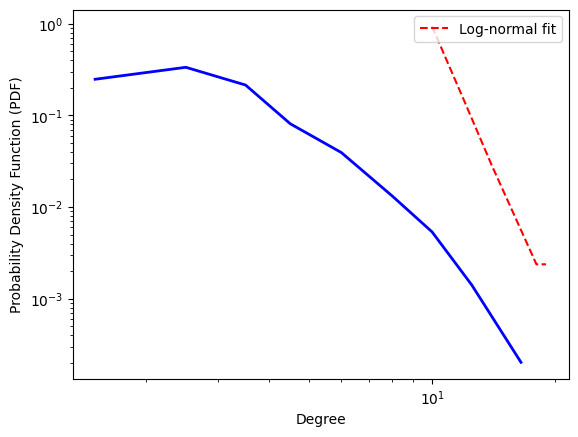

In [31]:

# Calculate the degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Fit the degree distribution to a power-law distribution for comparison
fit = powerlaw.Fit(degree_sequence, xmin=min(degree_sequence))

# Fit the degree distribution to a log-normal distribution
lognormal_fit = powerlaw.Fit(degree_sequence, distribution='lognormal')

# Plot the probability density function (PDF) of the empirical data
fig_pdf = fit.plot_pdf(color='b', linewidth=2)

# Overlay the PDF of the best-fit log-normal model
lognormal_fit.lognormal.plot_pdf(color='r', linestyle='--', ax=fig_pdf, label='Log-normal fit')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc='upper right')

# Show the plot
plt.show()


```Truncated Power-Law Fit of the Network Degree Distribution```


Calculating best minimal value for power law fit


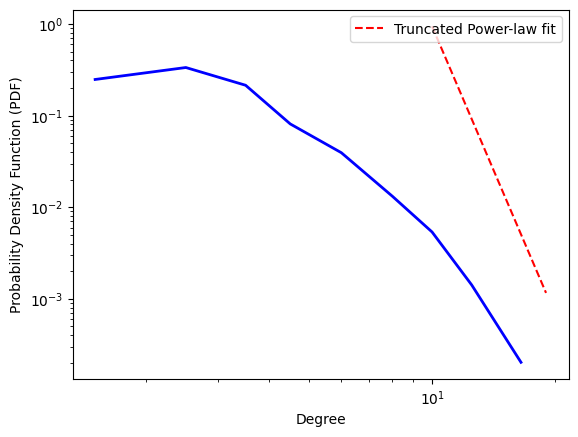

In [33]:

# Calculate the degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Fit the degree distribution to a power-law distribution for baseline comparison
fit = powerlaw.Fit(degree_sequence, xmin=min(degree_sequence))

# Fit the degree distribution to a truncated power-law distribution
truncated_powerlaw_fit = powerlaw.Fit(degree_sequence, distribution='truncated_power_law')

# Plot the probability density function (PDF) of the empirical data
fig_pdf = fit.plot_pdf(color='b', linewidth=2)

# Overlay the PDF of the best-fit truncated power-law model
truncated_powerlaw_fit.truncated_power_law.plot_pdf(color='r', linestyle='--', ax=fig_pdf, label='Truncated Power-law fit')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [13]:
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
dd

,k,count
4,1,1226
3,2,1656
0,3,1060
5,4,401
2,5,252
1,6,137
8,7,84
7,8,46
6,9,27
9,10,26


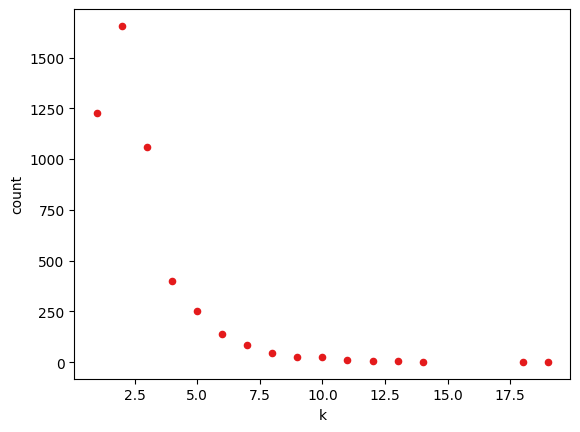

In [14]:
# We use the standard pandas plotting function to see the degree distribution and
# save it to file.
dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c")
plt.savefig("degree_distribution.png")
plt.show()

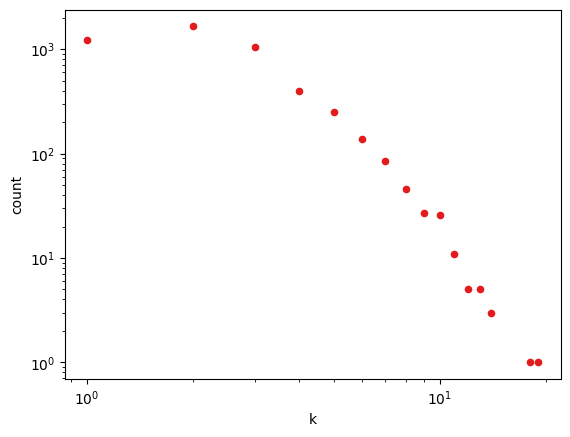

In [15]:
# The standard pandas plotting function allows us to use a log-log scale via a
# parameter, then we again save it to file.
dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c", loglog = True)
plt.savefig("degree_distribution_loglog.png")

In [16]:
# To make the CCDF we need to know how many nodes have degree equal to or higher
# than a specific value. So we sort the dataframe in descending degree order, so
# that the pandas cumsum function will calculate that for us. Then we normalize by
# the total degree sum, so that the count becomes a probability. We then sort in
# ascending degree value, to respect the convention.
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

ccdf

,k,ccdf
4,1,1.000000
3,2,0.751872
0,3,0.416717
5,4,0.202186
2,5,0.121028
1,6,0.070026
8,7,0.042299
7,8,0.025299
6,9,0.015989
9,10,0.010524


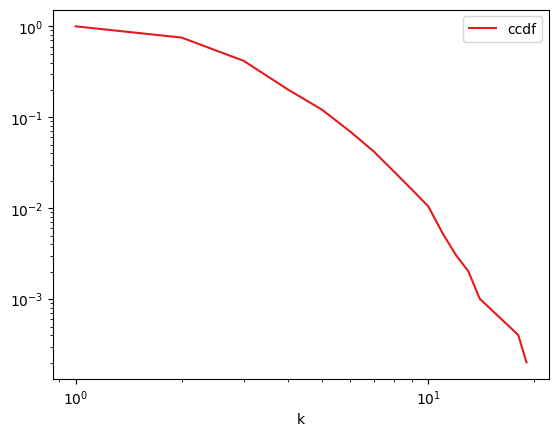

In [17]:
# Plot as usual and save it for later, since it's very pretty.
ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True)
plt.savefig("degree_distribution_ccdf.png")

In [20]:
logcdf = np.log10(ccdf[["k", "ccdf"]])
slope, log10intercept, r_value, p_value, std_err = linregress(logcdf["k"], logcdf["ccdf"])
print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" % (10 ** log10intercept, slope, r_value ** 2, p_value))

CCDF Fit: 7.0197 x ^ -3.0523 (R2 = 0.8882, p = 0.0000)


In [21]:
results = pl.Fit(ccdf["ccdf"])
k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 12.4207 x ^ -1.4448 (k_min = 10)


C:\Users\Gutu-PC\AppData\Local\Temp\ipykernel_4924\1195999143.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


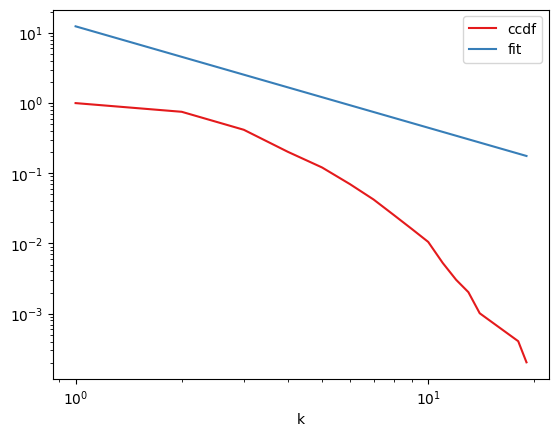

In [22]:
ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
ax = plt.gca()
ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
plt.savefig("ccdf_fit.png")

In [23]:
n = 4941  # number of nodes
m = 6594  # number of edges


In [24]:
random_graph = nx.gnm_random_graph(n, m)

In [29]:
ggs = [len(c) for c in sorted(nx.connected_components(random_graph), key=len, reverse=True)]
len(ggs)

386

In [30]:
# Constants for the power grid network
n = 4941  # number of nodes
m = 6594  # number of edges

# Generate a random network
def generate_random_network(n, m):
    return nx.gnm_random_graph(n, m)

# Function to calculate the average path length of the largest connected component
def calculate_largest_component_avg_path_length(graph):
    # Extract the largest connected component
    largest_component = max(nx.connected_components(graph), key=len)
    subgraph = graph.subgraph(largest_component)

    # Calculate average path length of the largest component
    return nx.average_shortest_path_length(subgraph)

# Example of usage
random_graph = generate_random_network(n, m)
avg_path_length_largest_component = calculate_largest_component_avg_path_length(random_graph)
avg_path_length_largest_component
 

8.474362632212786

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Constants for the power grid network
n = 4941  # number of nodes
m = 6594  # number of edges

# Generate a random network
def generate_random_network(n, m):
    return nx.gnm_random_graph(n, m)

# Function to calculate the average path length of the largest connected component
def calculate_largest_component_avg_path_length(graph):
    # Extract the largest connected component
    largest_component = max(nx.connected_components(graph), key=len)
    subgraph = graph.subgraph(largest_component)

    # Calculate average path length of the largest component
    return nx.average_shortest_path_length(subgraph)

# Lists to store the average path length and clustering coefficient for each network
avg_path_lengths_largest_component = []
clustering_coeffs = []

# Number of random networks to generate
num_networks = 10

for _ in range(num_networks):
    # Generate a random network
    random_graph = generate_random_network(n, m)

    # Calculate and store the average path length of the largest component

    avg_path_length = calculate_largest_component_avg_path_length(random_graph)
    avg_path_lengths_largest_component.append(avg_path_length)


    # Calculate and store the clustering coefficient of the whole network
    clustering_coeff = nx.average_clustering(random_graph)
    clustering_coeffs.append(clustering_coeff)


print(avg_path_lengths_largest_component)


[8.41444222271594, 8.393541391410825, 8.51822474784356, 8.472430469173604, 8.553599169859792, 8.411660721585472, 8.468918842130568, 8.529335264340903, 8.43479017105281, 8.484626855734]


In [35]:
print(avg_path_lengths_largest_component)
print(clustering_coeffs)   
print(np.mean(avg_path_lengths_largest_component))
print(np.mean(clustering_coeffs))

[8.41444222271594, 8.393541391410825, 8.51822474784356, 8.472430469173604, 8.553599169859792, 8.411660721585472, 8.468918842130568, 8.529335264340903, 8.43479017105281, 8.484626855734]
[0.00034695116662329775, 0.0006877985627226672, 0.00015130925877738263, 0.0007481937658015375, 0.0009242393577548404, 0.00023226453098948544, 0.0002019063039099469, 0.0001821493624772313, 0.00011468663563381231, 0.0001821493624772313]
8.468156985584747
0.00037716483071674326


In [ ]:
Q = (0.08/np.mean(clustering_coeffs))/(18.989/np.mean(avg_path_lengths_largest_component))
print(Q)

94.59008233321086


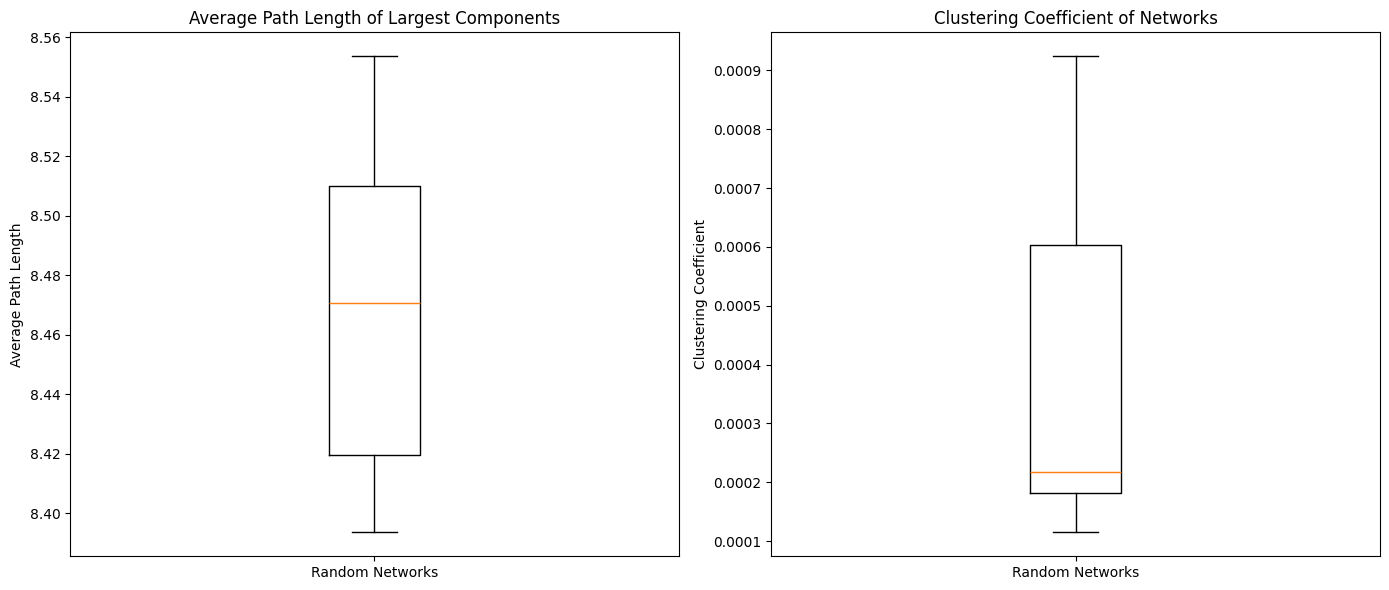

In [37]:
# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for average path length of the largest component
ax1.boxplot([length for length in avg_path_lengths_largest_component if length is not None])
ax1.set_title('Average Path Length of Largest Components')
ax1.set_ylabel('Average Path Length')
ax1.set_xticklabels(['Random Networks'])

# Plot for clustering coefficient of the whole network
ax2.boxplot(clustering_coeffs)
ax2.set_title('Clustering Coefficient of Networks')
ax2.set_ylabel('Clustering Coefficient')
ax2.set_xticklabels(['Random Networks'])

plt.tight_layout()
plt.show()

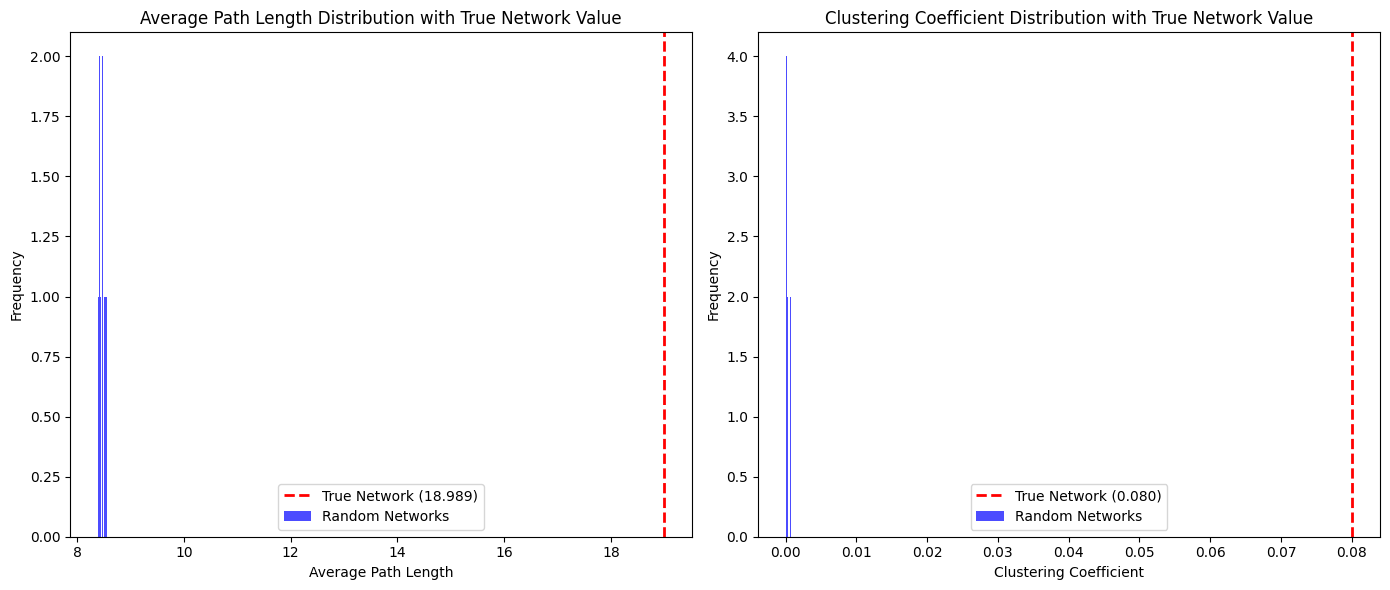

In [40]:
# Given values for the true network
true_network_avg_path_length = 18.989
true_network_clustering_coeff = 0.080

# Generate the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for average path length of the largest component with true network value
ax1.hist([length for length in avg_path_lengths_largest_component if length is not None], color='blue', alpha=0.7)
ax1.axvline(true_network_avg_path_length, color='red', linestyle='dashed', linewidth=2)
ax1.set_title('Average Path Length Distribution with True Network Value')
ax1.set_xlabel('Average Path Length')
ax1.set_ylabel('Frequency')
ax1.legend(['True Network (18.989)', 'Random Networks'])

# Plot for clustering coefficient of the whole network with true network value
ax2.hist(clustering_coeffs, color='blue', alpha=0.7)
ax2.axvline(true_network_clustering_coeff, color='red', linestyle='dashed', linewidth=2)
ax2.set_title('Clustering Coefficient Distribution with True Network Value')
ax2.set_xlabel('Clustering Coefficient')
ax2.set_ylabel('Frequency')
ax2.legend(['True Network (0.080)', 'Random Networks'])

plt.tight_layout()
plt.show()

In [56]:
adj_matrix = nx.to_numpy_array(G)
lattice = bct.latmio_und_connected(adj_matrix, 10)
lattice

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([4593, 1953, 3160, ..., 4281,  204,  229]),
 24351)

In [62]:
ad_amtrix_lattice = lattice[0]

In [65]:
ad_amtrix_lattice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
G_lattice = nx.from_numpy_array(ad_amtrix_lattice)

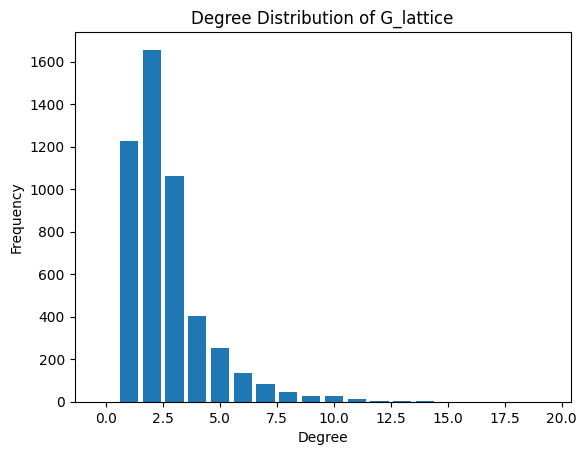

In [74]:

# Calculate the degree sequence
degree_sequence = nx.degree_histogram(G_lattice)

# Plot the degree distribution
plt.bar(range(len(degree_sequence)), degree_sequence)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of G_lattice')
plt.show()


In [75]:
clustering_coefficient = nx.average_clustering(G_lattice)
clustering_coefficient


0.0016880486218676868

In [77]:
# Create a random network with the same degree distribution as G
random_network = nx.configuration_model([d for n, d in G.degree()])

# Extract the largest connected component
largest_component = max(nx.connected_components(random_network), key=len)
subgraph = random_network.subgraph(largest_component)

# Compute the average path length of the largest component
average_path_length_largest_component_random = nx.average_shortest_path_length(subgraph)

average_path_length_largest_component_random


8.483396131593896

In [81]:
path_rand_on_true = 18.9891/average_path_length_largest_component_random
path_rand_on_true
clust_tru_on_rand = 0.080/clustering_coefficient
clust_tru_on_rand


small_world_coef = path_rand_on_true - clust_tru_on_rand
small_world_coef

print(f"Small World Coefficient: {small_world_coef}")
print(f"Average Path Length {path_rand_on_true}")
print(f"Clustering Coefficient {clust_tru_on_rand}")

Small World Coefficient: -45.153615613539635
Average Path Length 2.238384216113724
Clustering Coefficient 47.39199982965336
